# Q6

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

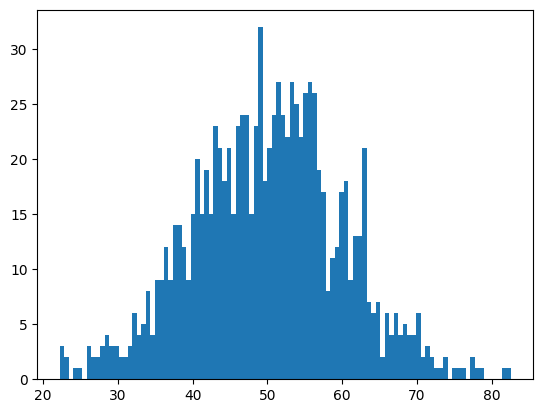

In [12]:
# Generate a sample from ~N(50, 10), 1000 times

data = np.random.normal(50, 10, 1000)

plt.hist(data, bins=100)
plt.show()

MLE mean: 50.037555468183214, MLE std: 9.989093806005505


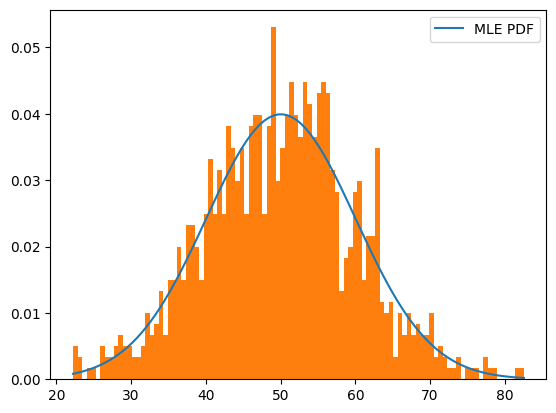

In [16]:
sample_mean = np.mean(data)
sample_std = np.std(data)

# We know for a normal distribution, the MLE gives the observed mean and variance as the parameters.

print(f"MLE mean: {sample_mean}, MLE std: {sample_std}")

mle_pdf = norm(sample_mean, sample_std)
x = np.linspace(np.min(data), np.max(data), 100)
plt.plot(x, mle_pdf.pdf(x), label='MLE PDF')
plt.hist(data, bins=100, density=True)
plt.legend()
plt.show()

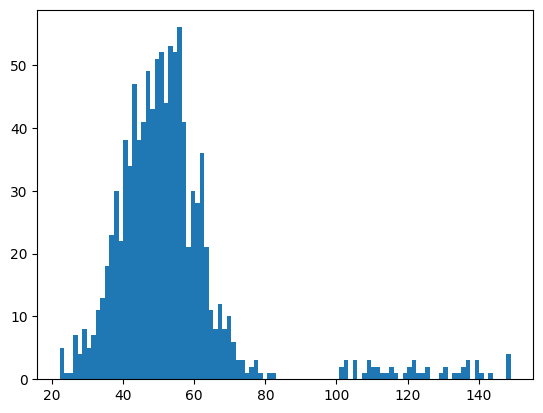

MLE mean: 53.50485434453635, MLE std: 18.581557790132496


In [17]:
outliers = np.random.uniform(100, 150, 50)
data = np.concatenate([data, outliers])
plt.hist(data, bins=100)
plt.show()
sample_mean = np.mean(data)
sample_std = np.std(data)
print(f"MLE mean: {sample_mean}, MLE std: {sample_std}")

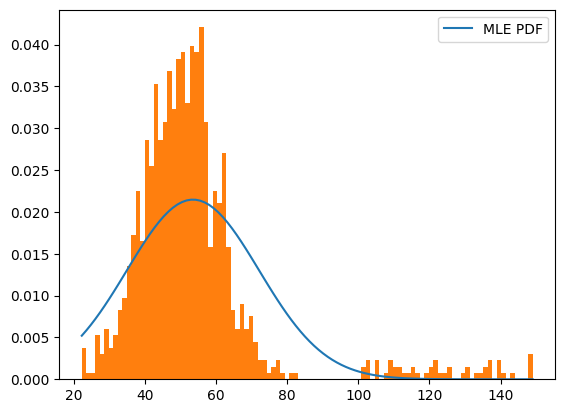

In [19]:
mle_pdf_new = norm(sample_mean, sample_std)
x = np.linspace(np.min(data), np.max(data), 100)
plt.plot(x, mle_pdf_new.pdf(x), label='MLE PDF')
plt.hist(data, bins=100, density=True)
plt.legend()
plt.show()

### Impact

**Mean**: The mean shifts to the right, since the outliers pull the mean to the right. The outliers have an expected mean of 125, so the mean moves closer to this.

**Standard Deviation**: The standard deviation is also increased, rather greatly, due to the outliers. Before the outliers are added, the STD was 10. However, by adding these, the variance of the data increases as there are points that are further away from the mean.

### How to work with outliers

A standard practice to detect and remove outliers is to use the Z-score. This is a measure of how many standard deviations away from the mean a data point is. If it is too far away, it is considered an outlier and can be removed. For example, a z-score of > 3 can be a threshold for outliers.
- However, it is important to note that this implies that the underlying distribution is normal. If the distribution is not normal, then this method may not be appropriate.

Another method is to use the IQR. This is the interquartile range, which is the range between the 25th and 75th percentile of the data. Any data points that are below Q1 - 1.5*IQR or above Q3 + 1.5*IQR are considered outliers and can be removed.